In [2]:
import numpy as np

# Initialize the lattice
def initialize_lattice(L):
    """Initialize an LxL lattice with random spin configuration (+1 or -1)."""
    return np.random.choice([-1, 1], size=L)

# Compute the energy change for a proposed spin flip with external magnetic field
def delta_energy(lattice, i, H):
    """Calculate the change in energy when flipping the spin at (i, j), including external field H."""
    L = lattice.shape[0]
    spin = lattice[i]
    neighbors_sum = (
        lattice[(i + 1) % L] +
        lattice[(i - 1) % L]
    )
    dE = 2 * spin * (neighbors_sum + H)  # Include external magnetic field H
    return dE

# Metropolis-Hastings step
def metropolis_step(lattice, beta, H):
    """Perform one Metropolis-Hastings step for the entire lattice."""
    L = lattice.shape[0]
    for _ in range(L):  # Attempt L^2 spin flips per step
        i = np.random.randint(L)
        
        dE = delta_energy(lattice, i, H)
        
        # Metropolis criterion
        if dE <= 0 or np.random.rand() < np.exp(-beta * dE):
            lattice[i] *= -1  # Flip the spin

# Run the simulation and calculate equilibrium magnetization
def run_simulation(L, beta, H, steps, equilibration_steps=100):
    """Run the Metropolis-Hastings simulation and calculate magnetization."""
    lattice = initialize_lattice(L)
    
    # Equilibrate the system
    for _ in range(equilibration_steps):
        metropolis_step(lattice, beta, H)
    
    # Calculate magnetization after equilibration
    magnetizations = []
    for step in range(steps):
        metropolis_step(lattice, beta, H)
        magnetization = np.sum(lattice) / L  # Magnetization per site
        magnetizations.append(magnetization)
    
    # Return average magnetization as equilibrium value
    # also the standard deviation of the magnetization 
    # to show the convergence of the MC simulation
    return np.mean(magnetizations), np.std(magnetizations)



In [4]:
# Parameters
L = 100  # Lattice size (LxL)
steps = 1000  # Number of Monte Carlo steps for measurement
equilibration_steps = 500  # Steps to reach equilibrium

# Temperature and external field range
temperatures = [1, 2, 5, 10] 
H_values = np.linspace(-10, 10, 16)  # Different external magnetic field strengths


# Run the simulation for different temperatures and fields
mag_avg_all = []
mag_std_all = []
for H in H_values:
    mag_avg_tmp = []
    mag_std_tmp = []
    for T in temperatures:
        print(T)
        beta = 1 / T
        mag_avg, mag_std = run_simulation(L, beta, H, steps, equilibration_steps)
        mag_avg_tmp.append(mag_avg)
        mag_std_tmp.append(mag_std)

    mag_avg_all.append(mag_avg_tmp)
    mag_std_all.append(mag_std_tmp)
    
mag_avg_all = np.array(mag_avg_all)
mag_std_all = np.array(mag_std_all)
    

1
2
5
10
1
2
5
10
1
2
5
10
1
2
5
10
1
2
5
10
1
2
5
10
1
2
5
10
1
2
5
10
1
2
5
10
1
2
5
10
1
2
5
10
1
2
5
10
1
2
5
10
1
2
5
10
1
2
5
10
1
2
5
10


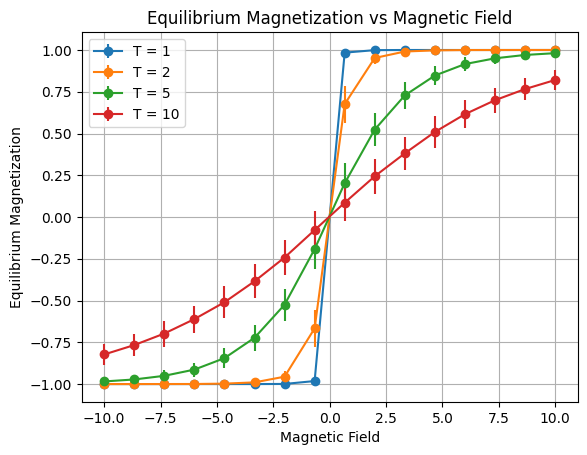

In [6]:
import matplotlib.pyplot as plt


plt.figure()

for iT in range(len(temperatures)):
    temp_tmp = temperatures[iT]
    plt.errorbar(
        H_values, 
        (mag_avg_all[:,iT]), 
        np.abs(mag_std_all[:,iT]), 
        fmt='o-', 
        label=f'T = {temp_tmp}'
    )

    
plt.xlabel('Magnetic Field')
plt.ylabel('Equilibrium Magnetization')
plt.title('Equilibrium Magnetization vs Magnetic Field')
plt.legend()
plt.grid(True)
# plt.show()

plt.savefig("Ising_1D_vary_H.pdf", dpi=150)